# **STUDENT AI** - MATH PREDICTION CLUSTER ANALYSIS

## Objectives

Complete a cluster analysis for MathScore results

## Inputs

Continues to assess dataset loaded in previous notebook.

## Outputs

Cluster Model and analysis charts.


---

In [1]:
import matplotlib.font_manager as font_manager

# Path to where your fonts are located
font_dir = '/usr/share/fonts/truetype/dejavu/'
font_files = font_manager.findSystemFonts(fontpaths=font_dir)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Attempt to set the font again
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# Import required libraries

In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Pipeline
from sklearn.pipeline import Pipeline

### Feature Engineering
from feature_engine.encoding import OrdinalEncoder

### Feature Scaling
from sklearn.preprocessing import StandardScaler

### libraries for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

### Feature Balancing
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Feature  Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

### EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

### packages for classification report and confusion matrix
from sklearn.metrics import make_scorer, recall_score

### Train test split
from sklearn.model_selection import train_test_split

### Packages for generating a classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

### GridSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

print('All Libraries Loaded')

All Libraries Loaded


/workspace/.pyenv_mirror/user/3.8.18/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Change working directory

### Set the working directory to notebook parent folder
If the output does not match, click **'clear all outputs'** and then **'restart'** the notebook. 
Then run cells from top to bottom.

In [3]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('If correct, Active Directory should read: /workspace/student-AI')
print(f"Active Directory: {current_dir}")

If correct, Active Directory should read: /workspace/student-AI
Active Directory: /workspace/student-AI


### Load cleaned dataset

In [4]:
df = pd.read_csv(f"outputs/dataset/Expanded_data_with_more_features_clean.csv")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75


In [5]:
df['NrSiblings'] = df['NrSiblings'].astype(object)

In [6]:
df.drop(columns=['ReadingScore','WritingScore'], inplace=True)

In [7]:
ALL_FEATURES = [
    'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
    'ParentMaritalStatus', 'PracticeSport','IsFirstChild','NrSiblings',
    'WklyStudyHours']

In [8]:
from sklearn.pipeline import Pipeline

### Feature Engineering
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### PCA
from sklearn.decomposition import PCA

### ML algorithm
from sklearn.cluster import KMeans


def PipelineCluster():
  pipeline_base = Pipeline([
      ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary',
                                                  variables = ALL_FEATURES) ),

      ("SmartCorrelatedSelection",SmartCorrelatedSelection(variables=None, method="spearman", 
                                                          threshold=0.6, selection_method="variance") ),

      ("scaler", StandardScaler()  ),  

      ("PCA", PCA(n_components=50, random_state=0) ), 

      ("model", KMeans(n_clusters=50, random_state=0) ), 


  ])
  return pipeline_base

In [9]:
pipeline_cluster = PipelineCluster()
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df)

print(df_pca.shape,'\n', type(df_pca))

(30641, 11) 
 <class 'numpy.ndarray'>


* The 11 components explain 100.0% of the data 



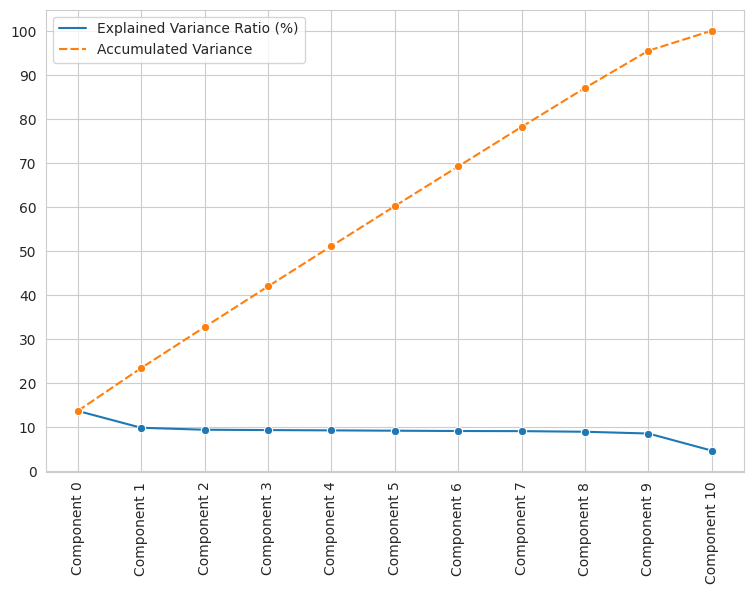

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

n_components = 11

def pca_components_analysis(df_pca, n_components): 
    pca = PCA(n_components=n_components).fit(df_pca)
    x_PCA = pca.transform(df_pca) # array with transformed PCA

    ComponentsList = ["Component " + str(number) for number in range(n_components)]
    dfExplVarRatio = pd.DataFrame(
        data= np.round(100 * pca.explained_variance_ratio_ ,3),
        index=ComponentsList,
        columns=['Explained Variance Ratio (%)'])

    dfExplVarRatio['Accumulated Variance'] = dfExplVarRatio['Explained Variance Ratio (%)'].cumsum() 

    PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

    print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
    plt.figure(figsize=(9,6))
    sns.lineplot(data=dfExplVarRatio,  marker="o")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 110, 10))
    plt.show()

pca_components_analysis(df_pca=df_pca,n_components=n_components)

* The 8 components explain 78.14% of the data 



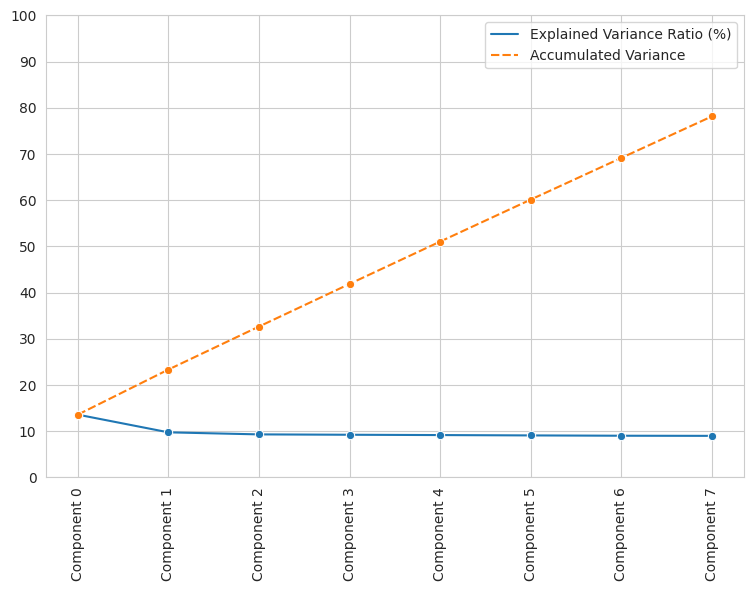

In [11]:
pca_components_analysis(df_pca=df_pca,n_components=8)

In [12]:
def PipelineCluster():
  pipeline_base = Pipeline([
      ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary',
                                                  variables = ALL_FEATURES) ),

      ("SmartCorrelatedSelection",SmartCorrelatedSelection(variables=None, method="spearman", 
                                                          threshold=0.6, selection_method="variance") ),

      ("scaler", StandardScaler()  ),  

      ("PCA", PCA(n_components=8, random_state=0) ),  ### we update n_components to 8

      ("model", KMeans(n_clusters=50, random_state=0) ), 


  ])
  return pipeline_base

PipelineCluster()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Gender', 'EthnicGroup',
                                           'ParentEduc', 'LunchType',
                                           'TestPrep', 'ParentMaritalStatus',
                                           'PracticeSport', 'IsFirstChild',
                                           'NrSiblings', 'WklyStudyHours'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=8, random_state=0)),
                ('model', KMeans(n_clusters=50, random_state=0))])

In [13]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df)

print(df_analysis.shape,'\n', type(df_analysis))

(30641, 8) 
 <class 'numpy.ndarray'>


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

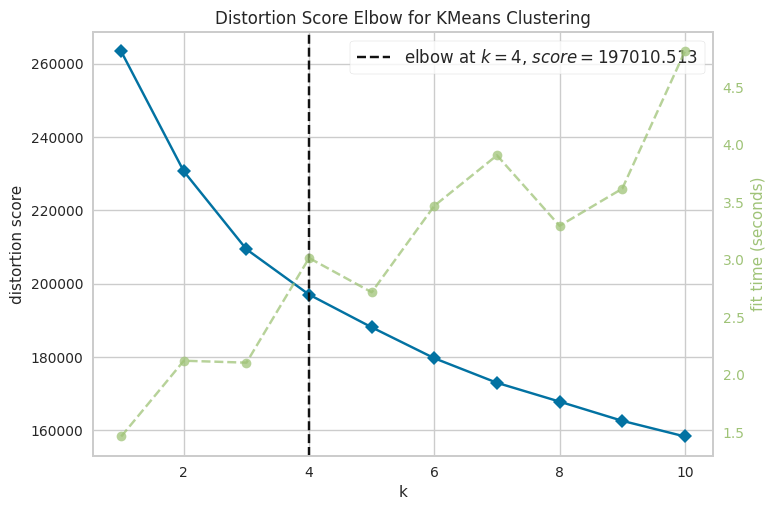

In [14]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11)) # 11 is not inclusive, it will plot until 10
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()

=== Average Silhouette Score for different number of clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

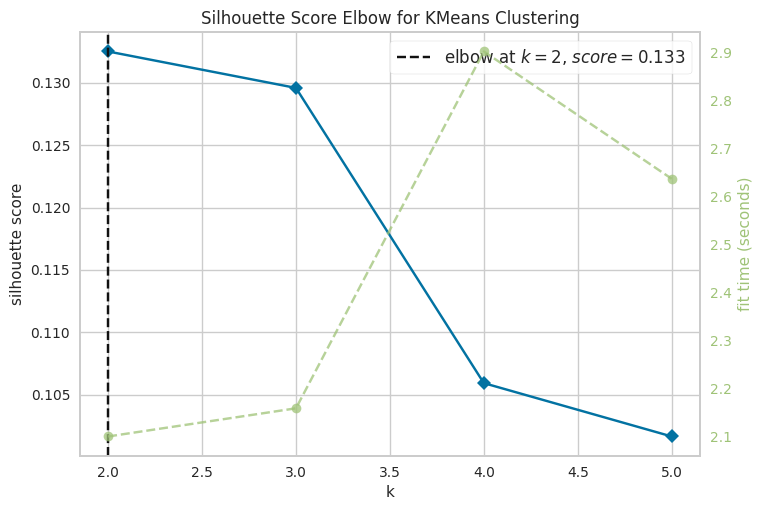



=== Silhoutte plot for 2 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

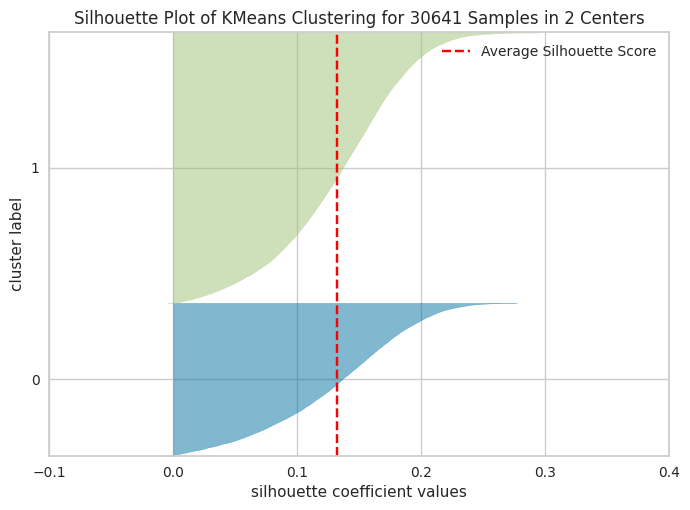



=== Silhoutte plot for 3 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

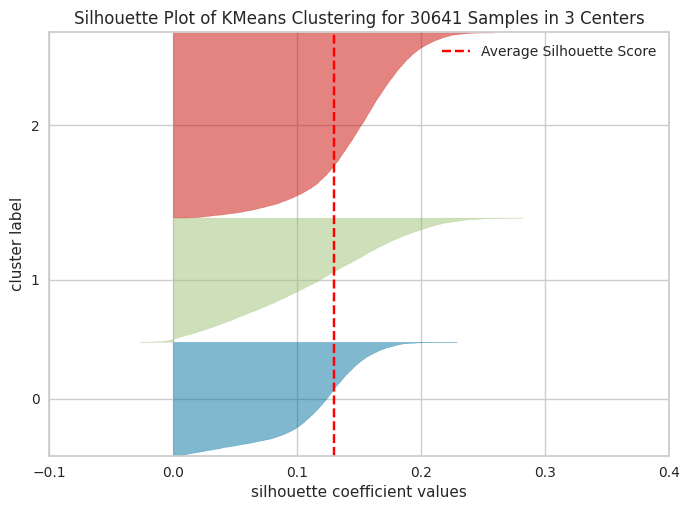



=== Silhoutte plot for 4 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

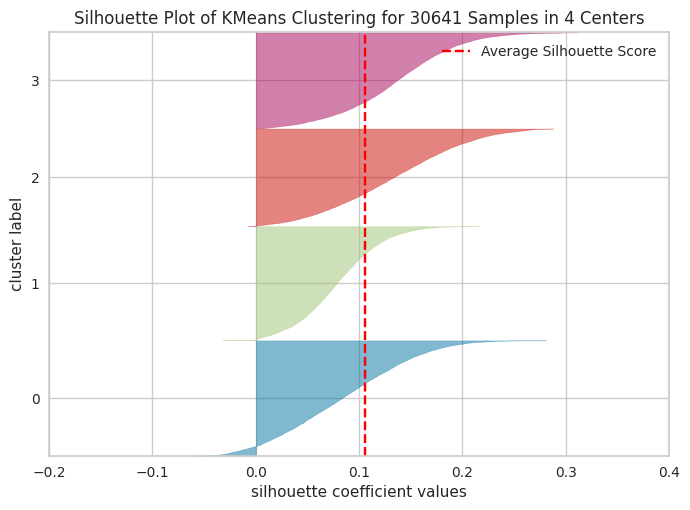



=== Silhoutte plot for 5 Clusters ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

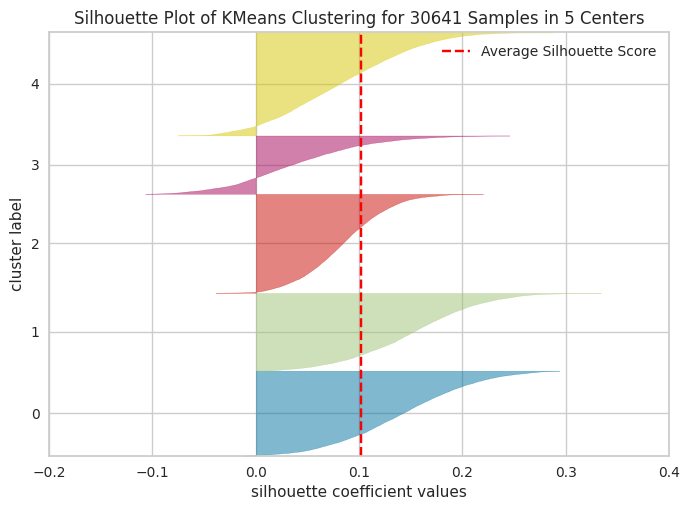

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster_start, n_cluster_stop = 2, 6 # 6 is not inclusive, it will go up to 5 in fact

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(n_cluster_start,n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start,stop=n_cluster_stop):
  
  print(f"=== Silhoutte plot for {n_clusters} Clusters ===")
  visualizer = SilhouetteVisualizer(estimator = KMeans(n_clusters=n_clusters, random_state=0),
                                    colors = 'yellowbrick')
  visualizer.fit(df_analysis)
  visualizer.show()
  plt.show()
  print("\n")

In [16]:
def PipelineCluster():
  pipeline_base = Pipeline([
      ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary',
                                                  variables = ALL_FEATURES) ),

      ("SmartCorrelatedSelection",SmartCorrelatedSelection(variables=None, method="spearman", 
                                                          threshold=0.6, selection_method="variance") ),

      ("scaler", StandardScaler()  ),  

      ("PCA", PCA(n_components=6, random_state=0) ), 

      ("model", KMeans(n_clusters=3, random_state=0) ),  ### we update n_clusters to 3


  ])
  return pipeline_base

PipelineCluster()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Gender', 'EthnicGroup',
                                           'ParentEduc', 'LunchType',
                                           'TestPrep', 'ParentMaritalStatus',
                                           'PracticeSport', 'IsFirstChild',
                                           'NrSiblings', 'WklyStudyHours'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=6, random_state=0)),
                ('model', KMeans(n_clusters=3, random_state=0))])

In [17]:
X = df.copy()
print(X.shape)
X.head(3)

(30641, 11)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87


In [18]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Gender', 'EthnicGroup',
                                           'ParentEduc', 'LunchType',
                                           'TestPrep', 'ParentMaritalStatus',
                                           'PracticeSport', 'IsFirstChild',
                                           'NrSiblings', 'WklyStudyHours'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Gender', 'EthnicGroup',
                                                     'ParentEduc', 'LunchType',
                                                     'TestPrep',
                                                     'ParentMarita

In [19]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(30641, 12)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,Clusters
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,0
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

* Clusters frequencies 
   Clusters
0      0.43
2      0.31
1      0.26 




findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

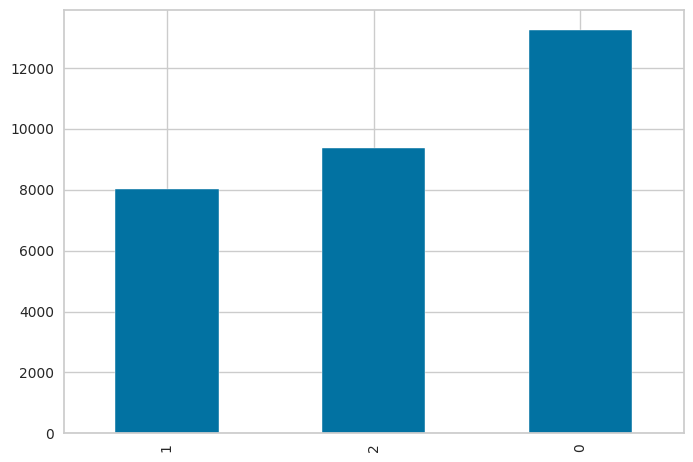

In [20]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.show()

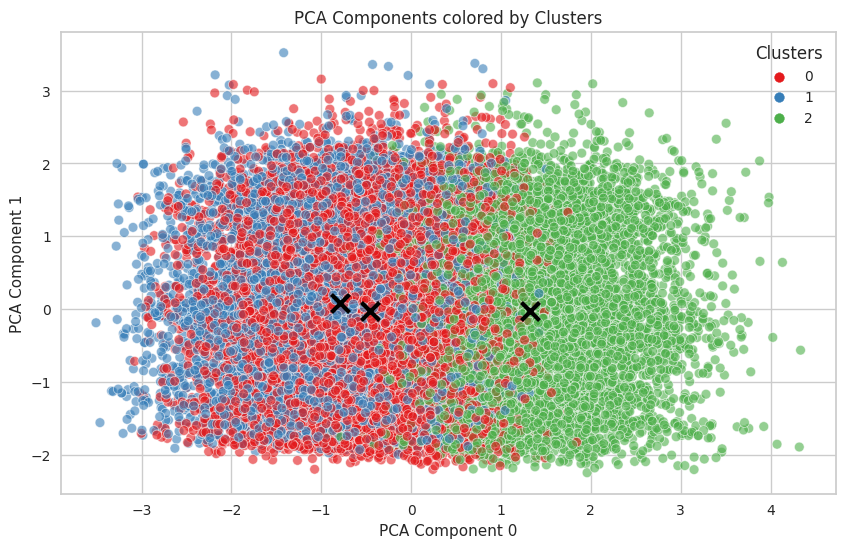

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_analysis[:,0], y= df_analysis[:,1], hue=X['Clusters'], palette='Set1', alpha=0.6)
plt.scatter(x=pipeline_cluster['model'].cluster_centers_[:, 0], y=pipeline_cluster['model'].cluster_centers_[:, 1],
            marker="x",s=169, linewidths=3, color="black")
plt.xlabel("PCA Component 0")
plt.ylabel("PCA Component 1")
plt.title("PCA Components colored by Clusters")
plt.show()

In [22]:
cluster_predictions_with_all_variables = X['Clusters']
cluster_predictions_with_all_variables

0        0
1        0
2        0
3        2
4        0
        ..
30636    0
30637    0
30638    2
30639    1
30640    0
Name: Clusters, Length: 30641, dtype: int32

In [23]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

(30641, 12)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,Clusters
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,0
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['Clusters'],axis=1),
                                    df_clf['Clusters'],
                                    test_size=0.2,
                                    random_state=0
                                    )

print(X_train.shape, X_test.shape)

(24512, 11) (6129, 11)


In [25]:
### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithm
from sklearn.ensemble import GradientBoostingClassifier 

def PipelineClf2ExplainClusters():
  pipeline_base = Pipeline([
      ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary',
                                                  variables = ALL_FEATURES) ),

      ("SmartCorrelatedSelection",SmartCorrelatedSelection(variables=None, method="spearman", 
                                                          threshold=0.6, selection_method="variance") ),

      ("scaler", StandardScaler()  ),  

      ("feat_selection", SelectFromModel(GradientBoostingClassifier(random_state=0)) ) , 

      ("model", GradientBoostingClassifier(random_state=0) ),  

  ])
  return pipeline_base


PipelineClf2ExplainClusters()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Gender', 'EthnicGroup',
                                           'ParentEduc', 'LunchType',
                                           'TestPrep', 'ParentMaritalStatus',
                                           'PracticeSport', 'IsFirstChild',
                                           'NrSiblings', 'WklyStudyHours'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))),
                ('model', GradientBoostingClassifier(random_state=0))])

In [26]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train, y_train)

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Gender', 'EthnicGroup',
                                           'ParentEduc', 'LunchType',
                                           'TestPrep', 'ParentMaritalStatus',
                                           'PracticeSport', 'IsFirstChild',
                                           'NrSiblings', 'WklyStudyHours'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Gender', 'EthnicGroup',
                                                     'ParentEduc', 'LunchType',
                                                     'TestPrep',
                                                     'ParentMarita

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10621
           1       0.97      0.96      0.97      6465
           2       0.94      0.95      0.95      7426

    accuracy                           0.96     24512
   macro avg       0.96      0.96      0.96     24512
weighted avg       0.96      0.96      0.96     24512



In [28]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2624
           1       0.97      0.97      0.97      1573
           2       0.95      0.95      0.95      1932

    accuracy                           0.96      6129
   macro avg       0.96      0.96      0.96      6129
weighted avg       0.96      0.96      0.96      6129



* These are the 3 most important features in descending order. The model was trained on them: 
['LunchType', 'TestPrep', 'MathScore'] 



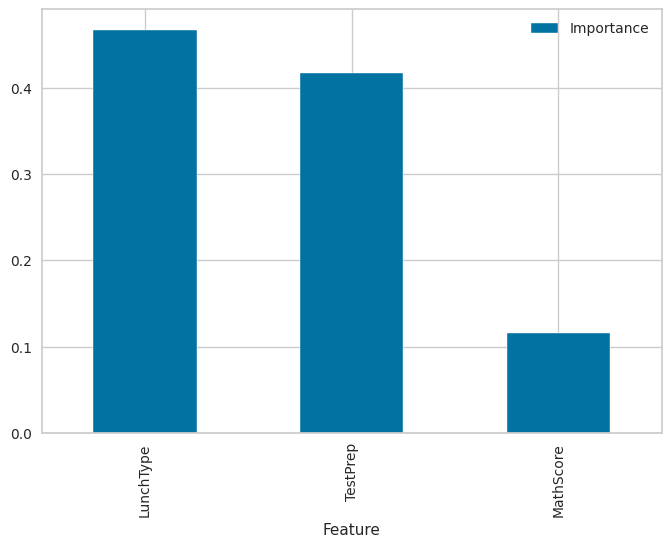

In [29]:
# after data cleaning and feat engineering, the feature space changes

data_cleaning_feat_eng_steps = 2 # how many data cleaning and feature engineering does your pipeline have?
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_clf_cluster.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)

best_features = columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()].to_list()

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
          'Feature': columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()],
          'Importance': pipeline_clf_cluster['model'].feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

best_features = df_feature_importance['Feature'].to_list() # reassign best features in importance order

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features} \n")
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.show()

In [30]:
best_features_pipeline_all_variables = best_features
best_features_pipeline_all_variables

['LunchType', 'TestPrep', 'MathScore']

In [31]:
def DescriptionAllClusters(df, decimal_points=3):

  DescriptionAllClusters = pd.DataFrame(columns=df.drop(['Clusters'],axis=1).columns)
  # iterate on each cluster , calls Clusters_IndividualDescription()
  for cluster in df.sort_values(by='Clusters')['Clusters'].unique():
    
      EDA_ClusterSubset = df.query(f"Clusters == {cluster}").drop(['Clusters'],axis=1)
      ClusterDescription = Clusters_IndividualDescription(EDA_ClusterSubset,cluster,decimal_points)
      DescriptionAllClusters = DescriptionAllClusters.append(ClusterDescription)

  
  DescriptionAllClusters.set_index(['Cluster'],inplace=True)
  return DescriptionAllClusters


def Clusters_IndividualDescription(EDA_Cluster,cluster, decimal_points):

  ClustersDescription = pd.DataFrame(columns=EDA_Cluster.columns)
  # for a given cluster, iterate in all columns
  # if the variable is numerical, calculate the IQR: display as Q1 -- Q3.
    # That will show the range for the most common values for the numerical variable
  # if the variable is categorical, count the frequencies and displays the top 3 most frequent
    # That will show the most common levels for the category

  for col in EDA_Cluster.columns:
    
    try:  # eventually a given cluster will have only mssing data for a given variable
      
      if EDA_Cluster[col].dtypes == 'object':
        
        top_frequencies = EDA_Cluster.dropna(subset=[col])[[col]].value_counts(normalize=True).nlargest(n=3)
        Description = ''
        
        for x in range(len(top_frequencies)):
          freq = top_frequencies.iloc[x]
          category = top_frequencies.index[x][0]
          CategoryPercentage = int(round(freq*100,0))
          statement =  f"'{category}': {CategoryPercentage}% , "  
          Description = Description + statement
        
        ClustersDescription.at[0,col] = Description[:-2]


      
      elif EDA_Cluster[col].dtypes in ['float', 'int']:
        DescStats = EDA_Cluster.dropna(subset=[col])[[col]].describe()
        Q1 = round(DescStats.iloc[4,0], decimal_points)
        Q3 = round(DescStats.iloc[6,0], decimal_points)
        Description = f"{Q1} -- {Q3}"
        ClustersDescription.at[0,col] = Description
    
    
    except Exception as e:
      ClustersDescription.at[0,col] = 'Not available'
      print(f"** Error Exception: {e} - cluster {cluster}, variable {col}")
  
  ClustersDescription['Cluster'] = str(cluster)
  
  return ClustersDescription

In [32]:
import plotly.express as px
def cluster_distribution_per_variable(df,target):

  # the data should have 2 variables, the cluster predictions and
  # the variable you want to analyze with, in this case we call "target"
  
  # we use plotly express to create 2 plots
  # cluster distribution across the target
  # relative presence of the target level in each cluster
  
   
  df_bar_plot = df.value_counts(["Clusters", target]).reset_index() 
  df_bar_plot.columns = ['Clusters',target,'Count']
  df_bar_plot[target] = df_bar_plot[target].astype('object')

  print(f"Clusters distribution across {target} levels")
  fig = px.bar(df_bar_plot, x='Clusters',y='Count',color=target,width=800, height=500)
  fig.update_layout(xaxis=dict(tickmode= 'array',tickvals= df['Clusters'].unique()))
  fig.show()


  df_relative = (df
                 .groupby(["Clusters", target])
                 .size()
                 .groupby(level=0)
                 .apply(lambda x:  100*x / x.sum())
                 .reset_index()
                 .sort_values(by=['Clusters'])
                 )
  df_relative.columns = ['Clusters',target,'Relative Percentage (%)']
 

  print(f"Relative Percentage (%) of {target} in each cluster")
  fig = px.line(df_relative, x='Clusters',y='Relative Percentage (%)',color=target,width=800, height=500)
  fig.update_layout(xaxis=dict(tickmode= 'array',tickvals= df['Clusters'].unique()))
  fig.update_traces(mode='markers+lines')
  fig.show()

In [33]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)
print(df_cluster_profile.shape)
df_cluster_profile.head(3)

(30641, 4)


,LunchType,TestPrep,MathScore,Clusters
0,standard,none,71,0
1,standard,none,69,0
2,standard,none,87,0


In [34]:
df_math_score = pd.read_csv("outputs/dataset/Expanded_data_with_more_features_clean.csv").filter(['MathScore'])
df_math_score['MathScore'] = df_math_score['MathScore'].astype('object')
df_math_score.head(3)

,MathScore
0,71
1,69
2,87


In [36]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df=pd.concat([df_cluster_profile, df_math_score], axis=1), decimal_points=0)
clusters_profile

** Error Exception: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all(). - cluster 0, variable MathScore
** Error Exception: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all(). - cluster 0, variable MathScore


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
df_cluster_vs_churn=  df_math_score.copy()
df_cluster_vs_churn['Clusters'] = X['Clusters']
cluster_distribution_per_variable(df=df_cluster_vs_churn, target='MathScore')

In [ ]:
best_features_pipeline_all_variables

In [ ]:
df_reduced = df.filter(best_features_pipeline_all_variables)
df_reduced.head(3)

In [ ]:
def PipelineCluster():
  pipeline_base = Pipeline([

      # we update the pipeline, considering only the most important variables from previous pipeline      
      ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary',
                                                variables = best_features_pipeline_all_variables ) ),

      # it doesn't need SmartCorrelation

      ("scaler", StandardScaler()  ),  

      # No PCA step needed, since we know which features to consider

      ("model", KMeans(n_clusters=3, random_state=0) ),


  ])
  return pipeline_base

PipelineCluster()

In [ ]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df_reduced)

print(df_analysis.shape,'\n', type(df_analysis))

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11))
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster_start, n_cluster_stop = 2, 5

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(n_cluster_start,n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start,stop=n_cluster_stop):
  
  print(f"=== Silhoutte plot for {n_clusters} Clusters ===")
  visualizer = SilhouetteVisualizer(estimator = KMeans(n_clusters=n_clusters, random_state=0),
                                    colors = 'yellowbrick')
  visualizer.fit(df_analysis)
  visualizer.show()
  plt.show()
  print("\n")

In [ ]:
X = df_reduced.copy()
print(X.shape)
X.head(3)

In [ ]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

In [ ]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

In [ ]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [ ]:
cluster_predictions_with_all_variables


In [ ]:
cluster_predictions_with_best_features = X['Clusters'] 
cluster_predictions_with_best_features

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(cluster_predictions_with_all_variables, cluster_predictions_with_best_features))

In [ ]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['Clusters'],axis=1),
                                    df_clf['Clusters'],
                                    test_size=0.2,
                                    random_state=0
                                    )

print(X_train.shape, X_test.shape)

In [ ]:
def PipelineClf2ExplainClusters():
  pipeline_base = Pipeline([
   
    ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary',
                                              variables = best_features_pipeline_all_variables ) ),

    # it doesn't need SmartCorrelation

    ("scaler", StandardScaler()  ),  

    # we don't consdier feature selection step, since we know which features to consider 

    ("model", GradientBoostingClassifier(random_state=0) ),  

  ])
  return pipeline_base


PipelineClf2ExplainClusters()

In [ ]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train,y_train)

In [ ]:
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

In [ ]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

In [ ]:
best_features = X_train.columns.to_list() # since we don't have feature selection step in this pipeline, best_features is Xtrain columns

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature':best_features,
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
.sort_values(by='Importance', ascending=False)
)

best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.show()

In [ ]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)
df_cluster_profile.head(3)

In [ ]:
df_math_score = pd.read_csv("outputs/dataset/Expanded_data_with_more_features_clean.csv").filter(['MathScore'])
df_math_score['MathScore'] = df_math_score['MathScore'].astype('object')
df_math_score.head(3)

In [ ]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df=pd.concat([df_cluster_profile, df_math_score], axis=1), decimal_points=0)
clusters_profile

In [ ]:
df_cluster_vs_churn=  df_math_score.copy()
df_cluster_vs_churn['Clusters'] = X['Clusters']
cluster_distribution_per_variable(df=df_cluster_vs_churn, target='MathScore')

In [ ]:
pipeline_cluster